Libraries

In [1]:
# Standard libraries
from cellpose import models, core, plot, utils

from skimage import exposure

import numpy as np
import matplotlib.pyplot as plt

# Custom packages
from utils.data.dataset_ht import HtDataset
from utils.data.imaging import read_nii

# Configurations
use_gpu = core.use_gpu()
print(f"GPU activated: {use_gpu}")

from cellpose.io import logger_setup
logger_setup();

GPU activated: True
2024-07-24 17:35:37,551 [INFO] WRITING LOG OUTPUT TO /home/imarcoss/.cellpose/run.log
2024-07-24 17:35:37,552 [INFO] 
cellpose version: 	3.0.10 
platform:       	linux 
python version: 	3.10.14 
torch version:  	2.3.1+cu118


In [2]:
ds = HtDataset()
ds.check_specimens()

img_idx = 0
img_path = ds.missing_nuclei[img_idx]
img_path_out = ds.missing_nuclei_out[img_idx]

img = read_nii(img_path, axes='ZXY')
print(img.shape)

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


2024-07-22 12:41:32,358 [INFO] pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
(450, 1024, 1024, 1)


In [3]:
model = models.Cellpose(gpu=use_gpu, model_type='nuclei')

2024-07-22 12:41:38,208 [INFO] ** TORCH CUDA version installed and working. **
2024-07-22 12:41:38,209 [INFO] >>>> using GPU
2024-07-22 12:41:38,211 [INFO] >> nuclei << model set to be used
2024-07-22 12:41:38,289 [INFO] >>>> loading model /home/imarcoss/.cellpose/models/nucleitorch_0
2024-07-22 12:41:38,356 [INFO] >>>> model diam_mean =  17.000 (ROIs rescaled to this size during training)


In [4]:
# img_equalized = cv2.equalizeHist(img)
img_equalized = exposure.equalize_hist(img)

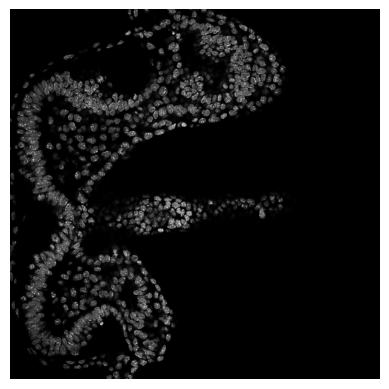

In [5]:
plt.imshow(img[270, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()

In [6]:
print(img_equalized.shape)

(1024, 1024, 450, 1)


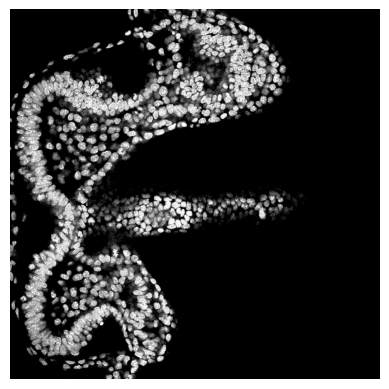

In [7]:
plt.imshow(img_equalized[270, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
masks, flows, styles, diams = model.eval(
    img_equalized, diameter=17, channels=[0, 0], 
    do_3D=True, normalize=True, 
    # channel_axis=2, z_axis=3
)

# masks_stitched, flows_stitched, styles_stitched, _ = model.eval(
# img_equalized, channels=[0, 0], diameter=25, do_3D=False, 
# stitch_threshold=0.5, normalize = True
# )

2024-07-22 12:42:01,759 [INFO] channels set to [0, 0]
2024-07-22 12:42:01,761 [INFO] ~~~ FINDING MASKS ~~~
2024-07-22 12:42:01,763 [INFO] multi-stack tiff read in as having 450 planes 1 channels
2024-07-22 12:42:20,162 [INFO] running YX: 450 planes of size (1024, 1024)
2024-07-22 12:44:39,882 [INFO] 100%|##########| 450/450 [02:18<00:00,  3.25it/s]
2024-07-22 12:44:52,617 [INFO] running ZY: 1024 planes of size (450, 1024)
2024-07-22 12:47:10,442 [INFO] 100%|##########| 512/512 [02:16<00:00,  3.75it/s]
2024-07-22 12:47:35,414 [INFO] running ZX: 1024 planes of size (450, 1024)
2024-07-22 12:49:52,630 [INFO] 100%|##########| 512/512 [02:16<00:00,  3.76it/s]
2024-07-22 12:50:22,946 [INFO] network run in 499.06s


In [ ]:
plt.figure(figsize=(12, 6))

for i, iplane in [100, 270, 400]:
  img0 = plot.image_to_rgb(img_equalized[iplane, [1, 0]].copy(), channels=[0, 0])
  
  plt.subplot(1,8,i+1)
  
  outlines = utils.masks_to_outlines(masks[iplane])
  outX, outY = np.nonzero(outlines)
  imgout= img0.copy()
  imgout[outX, outY] = np.array([255,75,75])
  
  plt.imshow(imgout)
  plt.title('iplane = %d'%iplane)